# Regressionsanalyse Powerlifting 

## Libraries

In [1]:
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

/tmp/ipykernel_42996/3663271753.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-02-26 09:43:53.412728: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-26 09:43:53.447502: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 09:43:53.447535: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin

## Data

In [2]:
rawdata = pd.read_csv("Data.csv")
rawdata.head()

,playerId,Name,Sex,Equipment,Age,BodyweightKg,BestSquatKg,BestDeadliftKg
0,19391.0,Carlos Ceron,M,Raw,23.0,87.30,205.0,235.0
1,15978.0,Tito Herrera,M,Wraps,23.0,73.48,220.0,260.0
2,27209.0,Levi Lehman,M,Raw,26.0,112.40,142.5,220.0
3,27496.0,Stacy Hayford,F,Raw,35.0,59.42,95.0,102.5
4,20293.0,Brittany Hirt,F,Raw,26.5,61.40,105.0,127.5


### Visualisierung der Daten

In [3]:
# Anzahl der Einträge ausgeben
num_entries = rawdata.shape[0]
print("Anzahl der Einträge in Rawdata:", num_entries)

# Eindeutige Kategorien ausgeben
unique_categories = rawdata["Equipment"].unique()
print("Kategorien in der Spalte von Eqipment:", unique_categories)  

# Überprüfen ob Diverse Geschlechter inkludiert sind
unique_categories = rawdata["Sex"].unique()
print("Kategorien in der Spalte von Eqipment:", unique_categories)  

# Altersspanne berechnen
print("Altersspanne der Teilnehmer:", rawdata["Age"].min(), "-", rawdata["Age"].max())

# Altersspanne berechnen
print("Körpergewicht der Teilnehmer:", rawdata["BodyweightKg"].min(), "-", rawdata["BodyweightKg"].max())

Anzahl der Einträge in Rawdata: 18900
Kategorien in der Spalte von Eqipment: ['Raw' 'Wraps' 'Single-ply' 'Multi-ply']
Kategorien in der Spalte von Eqipment: ['M' 'F']
Altersspanne der Teilnehmer: 7.0 - 83.0
Körpergewicht der Teilnehmer: 26.13 - 201.0


Erläuterung des Equipments:<br>
__Raw__ = Powerlifter verwenden kein Equipment<br>__Wraps__ = Athleten verwenden spezielle Bandagen für zusätzliche Stabilität an Knie oder Handgelenken <br>__Single-ply__ = Athleten tragen vollständige Ausrüstung, jedoch ist jede Schicht auf eine begrenzt.<br>__Multi-ply__ = Athleten tragen vollständige Ausrüstung mit mehreren erlaubten Schichten für maximale Unterstützung.



## Datenverarbeitung

### Fehlende Werte

In [4]:

# Überprüfen auf fehlende Werte
print(rawdata.isnull().sum())
num_entries = rawdata.shape[0]
print("Anzahl der Einträge in Rawdata:", num_entries, "\n")

# Da weniger als 1% der Daten unvollstänidg sind = Zeilen löschen
rawdata = rawdata.dropna(axis=0)

# Wiederholtes Überprüfen auf fehlende Werte
print(rawdata.isnull().sum())
num_entries = rawdata.shape[0]
print("Anzahl der Einträge in Rawdata:", num_entries, "\n")


playerId            0
Name                0
Sex                 0
Equipment           0
Age               175
BodyweightKg        0
BestSquatKg         0
BestDeadliftKg      0
dtype: int64
Anzahl der Einträge in Rawdata: 18900 

playerId          0
Name              0
Sex               0
Equipment         0
Age               0
BodyweightKg      0
BestSquatKg       0
BestDeadliftKg    0
dtype: int64
Anzahl der Einträge in Rawdata: 18725 



### Sonderfall BestSquatKg

In [5]:

#Identifizierung der Einträge mit nicht-numerischen Werten in "BestSquatKg"
#coerce erläutern
non_numeric_entries = pd.to_numeric(rawdata['BestSquatKg'], errors='coerce').isna()

#Ausgabe der fehlerhaften Einträge
print(rawdata[non_numeric_entries][['playerId', 'BestSquatKg']],"\n")

#Korrektur der fehlerhaften Einträge, indem der doppelte Punkt durch einen einzigen ersetzt wird
rawdata['BestSquatKg'] = rawdata['BestSquatKg'].str.replace('..', '.', regex=False)

#Konvertierung der korrigierten Spalte in einen numerischen Typ
rawdata['BestSquatKg'] = pd.to_numeric(rawdata['BestSquatKg'])

#Ausgabe der fehlerhaften Einträge
print(rawdata[non_numeric_entries][['playerId', 'BestSquatKg']],"\n")

#Umwandlung negativer Werte in "BestSquatKg" in positive durch Anwendung des absoluten Wertes, da wir vermuten dass es sich hier um Vorzeichen fehler handelt   
#zählen der negativen Werte
count_of_negative_rows = (rawdata['BestSquatKg'] < 0).sum()
print("Anzahl der Zeilen mit negativen Werten in 'BestSquatKg':", count_of_negative_rows)

#Anpasses der Vorzeichen mit absoluten Werten
rawdata['BestSquatKg'] = rawdata['BestSquatKg'].abs()

#Überprüfung 
count_of_negative_rows_updated = (rawdata['BestSquatKg'] < 0).sum()
print("Anzahl der Zeilen mit negativen Werten in 'BestSquatKg' nach Anpassung:", count_of_negative_rows_updated)









       playerId BestSquatKg
94      11462.0      102..5
1614    21517.0      227..5
1663    12116.0      133..0
1720    28706.0      192..5
1766    23256.0      105..0
2590    12648.0      195..0
2803    20917.0      237..5
4213     1659.0      122..5
9712    24353.0      295..0
12138   17751.0      180..0
12429   16459.0      205..0
12445   14456.0      110..0
12664   13558.0      220..0
16998     545.0      145..0
18527    5539.0      207..5 

       playerId  BestSquatKg
94      11462.0        102.5
1614    21517.0        227.5
1663    12116.0        133.0
1720    28706.0        192.5
1766    23256.0        105.0
2590    12648.0        195.0
2803    20917.0        237.5
4213     1659.0        122.5
9712    24353.0        295.0
12138   17751.0        180.0
12429   16459.0        205.0
12445   14456.0        110.0
12664   13558.0        220.0
16998     545.0        145.0
18527    5539.0        207.5 

Anzahl der Zeilen mit negativen Werten in 'BestSquatKg': 82
Anzahl der Zeilen mit ne

### Außreißer

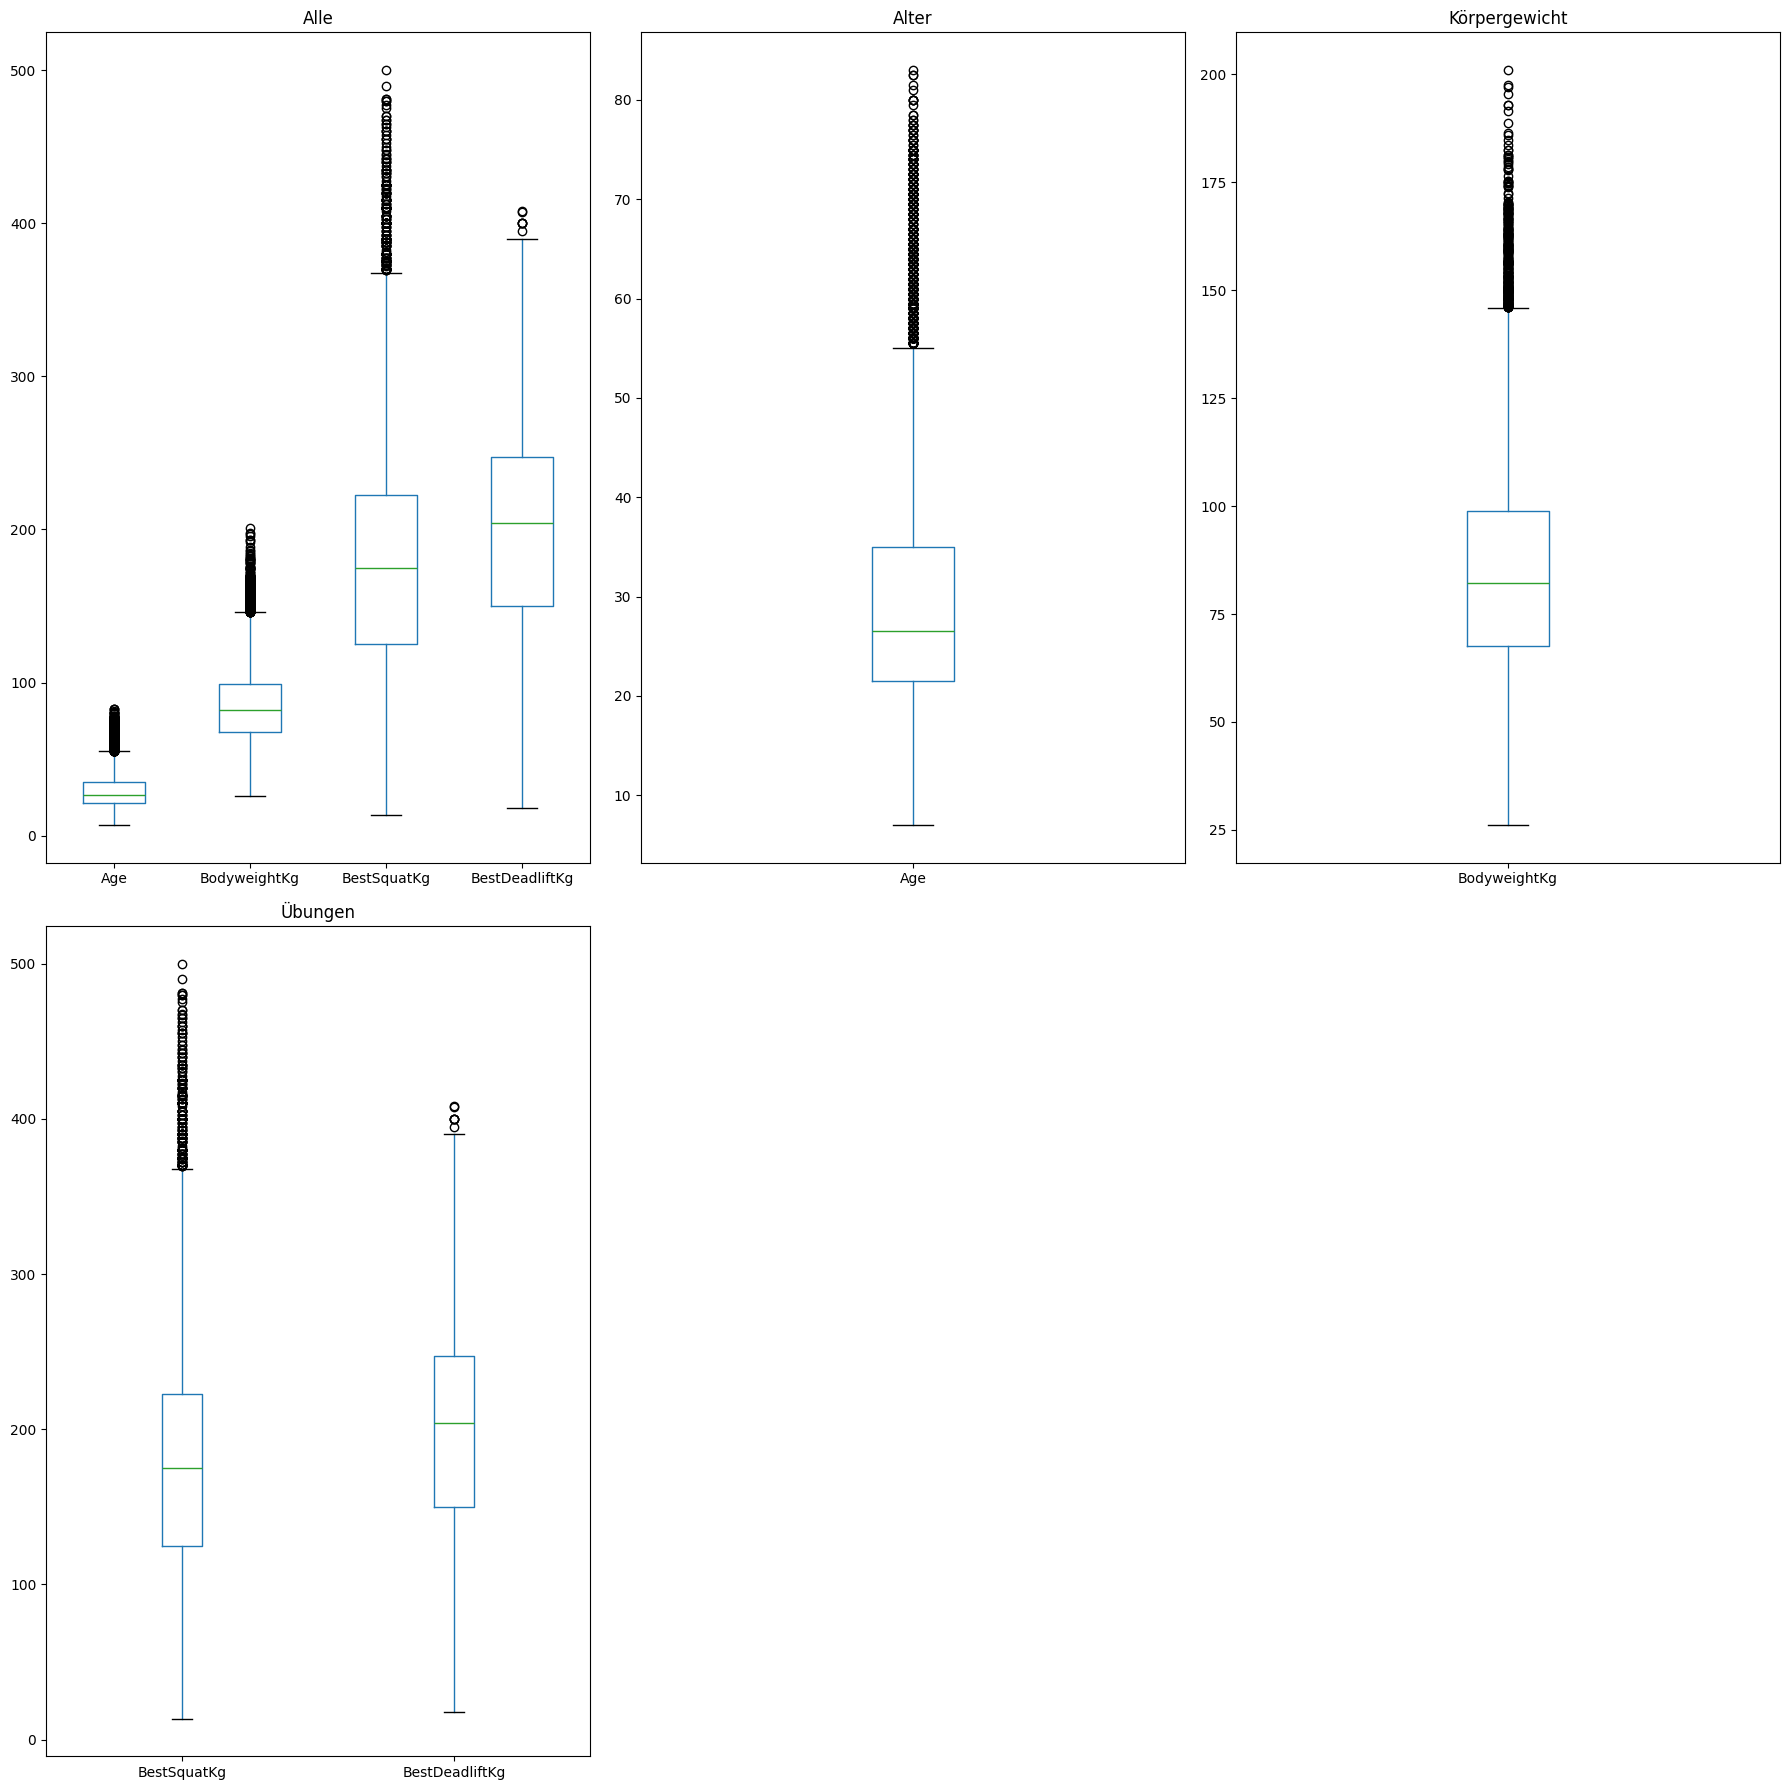

'\nsns.set_style("whitegrid")\nsns.boxplot(data=rawdata[\'Age\'])\n'

In [6]:
## Visualisieren der Ausreißer

#Formatierung
plt.figure(figsize=(18, 18)) 

# Subplot = Alle
plt.subplot(2, 3, 1)
rawdata.drop(columns=['playerId']).boxplot(grid=False)
plt.title('Alle')

# Subplot = Alter
plt.subplot(2, 3, 2)
rawdata.boxplot(column=['Age'], grid=False)
plt.title('Alter')

# Subplot = Körpergewicht
plt.subplot(2, 3, 3)
rawdata.boxplot(column=['BodyweightKg'], grid=False)
plt.title('Körpergewicht')

# Subplot = Übungen
plt.subplot(2, 3, 4)
rawdata.boxplot(column=['BestSquatKg', 'BestDeadliftKg'], grid=False)
plt.title('Übungen')

plt.tight_layout()
plt.show()

"""
sns.set_style("whitegrid")
sns.boxplot(data=rawdata['Age'])
"""

In [7]:
## Umgang mit Außreißer

#Festlegen der Interquantile
Q1 = rawdata['BestDeadliftKg'].quantile(q=0.25, interpolation='midpoint') # Q1 = np.percentile(rawdata['PRICE'], q=25, method='midpoint')
Q3 = rawdata['BestDeadliftKg'].quantile(q=0.75, interpolation='midpoint') # Q3 = np.percentile(rawdata['PRICE'], q=75, method='midpoint')
IQR = Q3 - Q1
print('Interquartile range: ', round(IQR, 2))

# Upper bound
upper_bound = Q3 + 1.5 * IQR
upper= np.array(rawdata['BestDeadliftKg'] > upper_bound)
print('Sum of upper values: ', upper.sum())
# Lower bound
lower_bound = Q1 - 1.5 * IQR
lower = np.array(rawdata['BestDeadliftKg'] < lower_bound)
print('Sum of lower values: ', lower.sum())

# Setting outliers to boundaries
rawdata.loc[rawdata['BestDeadliftKg'] > upper_bound, 'BestDeadliftKg'] = upper_bound
rawdata.loc[rawdata['BestDeadliftKg'] < lower_bound, 'BestDeadliftKg'] = lower_bound

Interquartile range:  97.81
Sum of upper values:  7
Sum of lower values:  0


### Dummifizierung

In [8]:
#Anpassen der Spalte Equipment
rawdata = pd.get_dummies(rawdata, columns=["Equipment"])

#Ausgabe
rawdata[['playerId', 'Equipment_Raw', 'Equipment_Wraps', 'Equipment_Single-ply', 'Equipment_Multi-ply']].head()

,playerId,Equipment_Raw,Equipment_Wraps,Equipment_Single-ply,Equipment_Multi-ply
0,19391.0,True,False,False,False
1,15978.0,False,True,False,False
2,27209.0,True,False,False,False
3,27496.0,True,False,False,False
4,20293.0,True,False,False,False


### Aufteilen in Trainingssets

In [9]:
# Convert data frame into numpy array and then split array into train and test arrays
train, test = train_test_split(rawdata.to_numpy(), shuffle=True)

### Formatierung der Trainingssets

In [10]:
"""
# Extract X and y
train_X, train_y = train[:, 1:], train[:, 0].reshape(-1, 1)
test_X, test_y = test[:, 1:], test[:, 0].reshape(-1, 1)

# Fit a scaler on the training set and distinguish between X and y fits for later inverse transformations
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
train_scaled_X = scaler_X.fit_transform(train_X)
train_scaled_y = scaler_y.fit_transform(train_y)
# Apply the same scalers with learned parameters from training set on test set
test_scaled_X = scaler_X.transform(test_X)
test_scaled_y = scaler_y.transform(test_y)
"""

#Furkan fragen

'\n# Extract X and y\ntrain_X, train_y = train[:, 1:], train[:, 0].reshape(-1, 1)\ntest_X, test_y = test[:, 1:], test[:, 0].reshape(-1, 1)\n\n# Fit a scaler on the training set and distinguish between X and y fits for later inverse transformations\nscaler_X = MinMaxScaler()\nscaler_y = MinMaxScaler()\ntrain_scaled_X = scaler_X.fit_transform(train_X)\ntrain_scaled_y = scaler_y.fit_transform(train_y)\n# Apply the same scalers with learned parameters from training set on test set\ntest_scaled_X = scaler_X.transform(test_X)\ntest_scaled_y = scaler_y.transform(test_y)\n'